# Analyse de sentiment

## Le dataset 

## Classifieur (+ pickle)

In [51]:
# Chargement des bibilothèques
import sys
import nltk
import sklearn
import random
import pickle
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import  LinearSVC, NuSVC

from sklearn.neighbors import KNeighborsClassifier

from nltk.classify import ClassifierI
from statistics  import mode
from nltk.tokenize import word_tokenize


# Affichage des versions des bibliothèques
print('Python: {}'.format(sys.version))
print('NLTK: {}'.format(nltk.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))

Python: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
NLTK: 3.4
Scikit-learn: 0.20.1


In [12]:
#chargement des sets
short_pos= open("C:/Users/Juliette/Desktop/SENTIMENT ANALYSIS/positive.txt","r").read()
short_neg= open("C:/Users/Juliette/Desktop/SENTIMENT ANALYSIS/negative.txt","r").read()

In [24]:
#pos = part of speech
#ici on determine trois grandes categories possibles de mot et on ne retient que les mots y appartenant (ici J : adjectifs)
#le choix de ne retenir que les adjectifs permet d'obtenir de meilleurs résultats globaux au vu de la nature du corpus et évite
#le bruit
documents= []
allowed_word_type =["J"]
all_words= []
for p in short_pos.split('\n'):
    documents.append((p,"pos"))
    words = nltk.word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos :
        if w[1][0] in allowed_word_type:
            all_words.append(w[0].lower())
            
for p in short_neg.split('\n'):
    documents.append((p,"neg"))
    words = nltk.word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos :
        if w[1][0] in allowed_word_type:
            all_words.append(w[0].lower())

print (all_words)
all_words=nltk.FreqDist(all_words)
print (all_words)

save_documents = open("documents.pickle","wb")
pickle.dump(documents, save_documents)
save_documents.close()


['21st', 'new', 'conan', 'greater', 'jean-claud', 'steven', 'elaborate', 'huge', 'expanded', 'effective', 'too-tepid', 'good', 'rare', 'honest', 'great', 'neurotic', 'absolute', 'good', 'snappy', 'clever', 'different', 'asian', 'low-key', 'genuine', 'greatest', 'family-oriented', 'fantasy-adventure', 'utterly', 'famous', 'talky', 'masterpiece', 'willing', 'inscrutable', 'fresh', 'true', 'thoughtful', 'provocative', 'top', 'independent', 'incisive', 'bleakly', 'evocative', 'hypnotic', 'nice', 'standard', 'few', 'dedicated', 'good-hearted', 'melodramatic', 'effective', 'idealistic', 'latent', '15-year-old', 'brisk', 'familiar', 'earlier', 'pint-sized', 'real', 'masterful', 'deceptive', 'forgettable', 'easy', 'new', 'funeral', 'thoughtful', 'hugh', 'literate', 'smart', 'static', 'two-lane', 'spooky', 'lolita', 'best', 'distinguished', 'distinctive', 'bona-fide', 'fascinating', 'willing', 'most', 'recent', 'outlandish', 'heavy', 'better', 'last-minute', 'happy', 'plausible', 'novel', 'grea

In [25]:
#fonction recherche de features
def find_features(document):
    words = nltk.word_tokenize(document) 
    features= {}
    for w in word_features:
        features[w]=(w in words)
        
    return features


In [26]:
#établissement des features
word_features =list(all_words.keys())[:5000] #les 5000 mots les plus importants
#save_word_features = open("word_features5k.pickle","wb")
#pickle.dump(word_features, save_word_features)
#save_word_features.close()

In [27]:
#établissement des featuresets
featuresets= [(find_features(rev),category)for (rev,category)in documents]

#save_file = open("featuresets.pickle","wb")
#pickle.dump(featuresets,save_file)
#save_file.close()

In [28]:
#on "mélange" les featuresets pour éviter le surentraînement
random.shuffle(featuresets)
print(len(featuresets))

10664


In [29]:
#on scinde le featureset en deux sets : entraînement et test
training_set =featuresets[:10000]
test_set = featuresets[10000:]

In [40]:
#appels aux différents classifieurs (après sélection en fonction de leur accuracy) des bibliothèques nltk et scikitlearn
classifier = nltk.NaiveBayesClassifier.train(training_set)
print(" (nltk/original) NBA accuracy :",nltk.classify.accuracy(classifier,test_set)*100)
classifier.show_most_informative_features(10)

BNB_classifier =SklearnClassifier(BernoulliNB())
BNB_classifier.train(training_set)
print(" BNBA accuracy :",nltk.classify.accuracy(BNB_classifier,test_set)*100)

MNB_classifier =SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print(" MNBA accuracy :",nltk.classify.accuracy(MNB_classifier,test_set)*100)
 

LogReg_classifier =SklearnClassifier(LogisticRegression())
LogReg_classifier.train(training_set)
print(" Logistic Regression accuracy :",nltk.classify.accuracy(LogReg_classifier,test_set)*100)

SGD_classifier =SklearnClassifier(SGDClassifier())
SGD_classifier.train(training_set)
print(" SGD accuracy :",nltk.classify.accuracy(SGD_classifier,test_set)*100)


 

LinSVC_classifier =SklearnClassifier(LinearSVC())
LinSVC_classifier.train(training_set)
print("Linear SVC accuracy :",nltk.classify.accuracy(LinSVC_classifier,test_set)*100)


NuSVC_classifier =SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print(" NuSVC accuracy :",nltk.classify.accuracy(NuSVC_classifier,test_set)*100)

 (nltk/original) NBA accuracy : 84.03614457831326
Most Informative Features
              engrossing = True              pos : neg    =     21.2 : 1.0
                  stupid = True              neg : pos    =     18.2 : 1.0
                mediocre = True              neg : pos    =     16.8 : 1.0
                 routine = True              neg : pos    =     15.5 : 1.0
                 generic = True              neg : pos    =     14.9 : 1.0
              refreshing = True              pos : neg    =     14.5 : 1.0
               inventive = True              pos : neg    =     14.5 : 1.0
                  boring = True              neg : pos    =     13.4 : 1.0
                    flat = True              neg : pos    =     13.3 : 1.0
               wonderful = True              pos : neg    =     12.3 : 1.0
 BNBA accuracy : 83.73493975903614
 MNBA accuracy : 82.68072289156626


C:\Users\Juliette\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 Logistic Regression accuracy : 85.09036144578313


C:\Users\Juliette\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


 SGD accuracy : 83.13253012048193
Linear SVC accuracy : 88.85542168674698


C:\Users\Juliette\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


 NuSVC accuracy : 84.78915662650603


In [41]:
#on effectue un "pickling" des differents classifieurs afin de d'accélerer le temps d'execution

save_classifier =open("naivebayes.pickle","wb") #write in bytes nec.
pickle.dump (classifier, save_classifier)
save_classifier.close()

save_classifier = open("BNBA.pickle","wb")
pickle.dump(BNB_classifier,save_classifier)
save_classifier.close()

save_classifier1 = open("MNBA.pickle","wb")
pickle.dump(MNB_classifier,save_classifier1)
save_classifier1.close()

save_classifier2 = open("LogReg.pickle","wb")
pickle.dump(LogReg_classifier,save_classifier2)
save_classifier2.close()

save_classifier3 = open("SGD.pickle","wb")
pickle.dump(SGD_classifier,save_classifier3)
save_classifier3.close()

save_classifier4 = open("LinSVC.pickle","wb")
pickle.dump(LinSVC_classifier,save_classifier4)
save_classifier4.close()

save_classifier5 = open("NuSVC.pickle","wb")
pickle.dump(NuSVC_classifier,save_classifier5)
save_classifier5.close()

## Module sentiment (après pickling) 

In [54]:
##détermine le classifieur à
#construction d'une classe classifieur (notre propre classifieur).
#On passe l'ensemble des classifieurs établis plus loin en argument

class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
        
#méthode classify, similaire à celle native à la bibiliothèque NLTK. On a une itération des classifieurs, 
#avec une classification basée sur les features pour chacun d'entre eux         
#la classification est traitée comme un vote. Après l'itération, on retourne le vote le plus "populaire"

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
    
#on ajoute un paramètre : la confiance. Ainsi on prend également en compte le ratio des votes en faveur ou contre le vote "élu"
#On retourne donc le ratio des votes comme critère de confiance
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [44]:
#on récupère les données et les sets établis précédemment
documents_f = open("documents.pickle", "rb")
documents = pickle.load(documents_f)
documents_f.close()

word_features5k_f = open("word_features5k.pickle", "rb")
word_features = pickle.load(word_features5k_f)
word_features5k_f.close()

In [45]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [46]:
featuresets_f = open("featuresets.pickle", "rb")
featuresets = pickle.load(featuresets_f)
featuresets_f.close()

random.shuffle(featuresets)
print(len(featuresets))

testing_set = featuresets[10000:]
training_set = featuresets[:10000]

10664


In [53]:
open_file = open("naivebayes.pickle", "rb")
classifier = pickle.load(open_file)
open_file.close()


open_file = open("MNBA.pickle", "rb")
MNB_classifier = pickle.load(open_file)
open_file.close()



open_file = open("BNBA.pickle", "rb")
BernoulliNB_classifier = pickle.load(open_file)
open_file.close()


open_file = open("LogReg.pickle", "rb")
LogisticRegression_classifier = pickle.load(open_file)
open_file.close()


open_file = open("LinSVC.pickle", "rb")
LinearSVC_classifier = pickle.load(open_file)
open_file.close()


open_file = open("SGD.pickle", "rb")
SGDC_classifier = pickle.load(open_file)
open_file.close()

open_file = open("NuSVC.pickle","rb")
NuSVC_classifier= pickle.load(open_file)
open_file.close()

In [56]:
#création d'une instance de notre propre classifieur
voted_classifier = VoteClassifier(
                                  classifier,
                                  LinearSVC_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier,LinearSVC_classifier,NuSVC_classifier,)

In [57]:
#méthode de classification avec notre classifieur
def sentiment(text):
    feats = find_features(text)
    return voted_classifier.classify(feats),voted_classifier.confidence(feats)

In [58]:
#test du module
print(sentiment("I hate this so much. I'm already bitter af after confirming that shit leak. Fuck outta here."))

('neg', 1.0)


## Flux Twitter  

In [62]:
import time
import json
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler  
from tweepy.streaming import StreamListener 
#import sentiment_module as s

ckey='sroswScAmttwtccdY2x4OzBkx'
csecret='GcOwemcXgSsNBFOoVVxIQCPiE7QyNeY4kfITaapsMeVCXI35uU'
atoken='1100481382525095937-oLydOfEtLnir4hfI0MAUcVR4ROzqLk'
asecret='83NgoJFNC8JBFbbxe8nQMd50eOtRvA8SLca6kX3mqC4vc'

class Listener (StreamListener):
    def on_data(self,data):
        try:
            #print (data) --only for full data
#            tweet = data.split (',"text":"')[1].split('","source')[0] #trims down to text
           
            #saveThis = str(time.time())+ '::'+tweet #avoid common punctuation
#            saveThis=open('tweetDB2.csv','a')
#            saveThis.write(tweet)
#            saveThis.write('\n')
#            saveThis.close()
#            
            '''
            saveFile=open('tweetDB.csv','a')#create a file iot save the data
            saveFile.write(data)
            saveFile.write('\n')
            saveFile.close()
            '''
            all_data = json.loads(data)
            tweet = all_data["text"]
            sentiment_value,confidence = sentiment(tweet)
            print (tweet,sentiment_value,confidence)
            
            if confidence*100 >= 80 :
                output = open ("twitter-out.txt","a")
                output.write(sentiment_value)
                output.write('\n')
                output.close()
                
                            
            return True
        except BaseException as e: #gestion d'éventuels problèmes de connexion 
            print ('failed ondata,', str(e))
            time.sleep(8) #en cas de connexion limitée, évite tentative de reconnexion constante
    def on_error(self,status):
        print (status)
        
auth =OAuthHandler(ckey,csecret)
auth.set_access_token(atoken,asecret)
twitterStream= Stream(auth,Listener())
twitterStream.filter(track=["Trump"])         

RT @WayneDupreeShow: Meghan McCain — Trump Is Obsessed With The Fact He Will Never Be Great Like My Father 

If John McCain were so great,… pos 1.0
@beyerstein It's part of the new thing of giving each Trump policy a DSM diagnosis neg 0.8571428571428571
RT @politvidchannel: BREAKING: A conservative group, Republicans for the Rule of Law is planning to air Ads on Fox &amp; Friends next week That… neg 0.7142857142857143
I wish we could do this in the U.S. when politicians fail to carry through with their promises.😂 neg 0.8571428571428571
'If the Senate acquits you, why bring charges against him in the private sector when he's no longer president?' So… https://t.co/1Qu5c9rMx9 neg 1.0
Presidents should take responsibility for WH actions.  What happened to The Buck Stops Here? neg 1.0
RT @RawStory: MSNBC host humiliates Trump with list of drastically discounted apartments in Trump Tower that tenants can't sell: 'It's a bl… neg 1.0
RT @EricColumbus: @thehowie @gtconway3d Trump is the Dunning

RT @tribelaw: Trump on #Impeachment: “It’s a dirty, filthy, disgusting word.” Those obscene Founding Fathers!  A bunch of dirty old men, ap… neg 1.0
RT @TurcoTimo: Nasa çalışanı ve papaz için Trump arar serbest kalırlar,

Alman gazeteci için Merkel, Fransız için Makron arar tahliye edili… neg 1.0
RT @cristianafarias: And we have a filing at the Supreme Court: The justices are now on notice about the shenanigans of the Trump administr… neg 1.0
RT @AOC: The Trump administration is trying to rig the 2020 Census to nearly guarantee a gerrymandered Republican majority in the House for… neg 1.0
RT @elindepcom: 🔴 Corea del Norte ejecuta a los "responsables" del fracaso de la cumbre con Trump en Hanói 
https://t.co/Cs7Y3kOeSp neg 0.5714285714285714
RT @SaraCarterDC: Donald Trump Declares Tariffs on Mexico Until Illegal Immigration Stops | via @BreitbartNews |   https://t.co/v5luSQh0yP neg 1.0
RT @John_KissMyBot: Alan Dershowitz Puts The Spotlight On Mueller And Nails Him

Alan Dershowitz: ‘Sha

RT @LawWorksAction: [MUST WATCH] @JudgeNap and @FoxNews anchors all agree: Special Counsel Mueller did NOT exonerate @realDonaldTrump and f… neg 1.0
For the Lord himself shall descend from heaven with a shout, with the voice of the archangel, and with the trump of… https://t.co/16NH2B5p2H neg 1.0
RT @realDonaldTrump: Congressman John Ratcliffe, “The Trump Campaign clearly did not conspire or collude.” @FoxNews neg 1.0
RT @corley_kurt: Obamagate was a scam by law enforcement to have Trump talk 2the FBI so they could charge him with lying to the FBI. The on… neg 1.0
@DeplorableNew @NanaMariIyn @History27361891 @TrumpSugar @MariaZupan @MIKEMAGAMAN1 @calijeff1 @TheMartyrSpeaks… https://t.co/KfhCors6TK neg 1.0
RT @kevinjgsmith: Guess who is making a surprise appearance on the @thismorning sofa today?
Chuck in a few quid to make @TrumpBabyUK fly on… neg 1.0
I've just joined the campaign against bad trade deals with Trump which put our NHS and food standards at risk. Will… https://t.co/B1yQam

RT @ASK_des: @Femi_Sorry Don’t you ever stop talking bollocks slagging off Nigel Farage &amp; Donald Trump. 2 brilliant men fighting for the 🇬🇧… pos 1.0
RT @gillibrandny: The American people deserve an open process to look at documents and hear from witnesses related to the Mueller investiga… pos 1.0
When islamofactobia meets kuffarists🤔 neg 1.0
RT @PaulRigbywrites: TRUMP THURSDAY SPECIAL!!

For every 100 RTs of this tweet in the next 24 hrs, I’ll send one of you RTifiers a special… neg 1.0
RT @ScottMStedman: Wow. In a single phone call, Trump overrides months of foreign policy and takes a step to allow Turkey to purchase US F'… neg 1.0
RT @tamcohen: When Pete Willsman’s comments about Jewish “Trump fanatics” surfaced last summer, this is what the chair of Labour’s disputes… pos 0.7142857142857143
RT @LindseyGrahamSC: I support President Trump's decision to impose tariffs on Mexico until they up their game to help us with our border d… neg 1.0
RT @JulianCastro: Donald Trump is attempti

RT @chuckwoolery: I don't care who the Democrats choose to run against President Trump. I could never vote for the Anti-constitution, anti-… neg 1.0
RT @SaraCarterDC: Donald Trump Declares Tariffs on Mexico Until Illegal Immigration Stops | via @BreitbartNews |   https://t.co/v5luSQh0yP neg 1.0
RT @TheDailyEdge: In case you’re wondering how the rich are doing since the Trump tax cuts: Steve Mnuchin’s dad just paid $91 million for a… pos 1.0
RT @turandursun06: Trump;nasa çalışanı bir fetöcü rehindi,dün aradım tayibi eve yolladı teşşekkür ederim! İşte ülkede adalet,olan 15 temmuz… neg 1.0
RT @ananavarro: Trump:
- Boasted of grabbing women by the “p*ssy”
-Called some countries w/mostly black &amp; brown populations, “shit-holes”
-… neg 1.0
Amen neg 1.0
RT @BillKristol: Here it is, from Republicans for the Rule of Law, and soon (in a shorter version) coming as an ad to TV set near you: Seni… neg 1.0
RT @chrislhayes: This is pretty explosive https://t.co/JgUW4QW1rh pos 0.5714285714285714
St

RT @Bill_Maxwell_: Trump, the guy who calls Vladimir Putin a "very strong" and "honorable" man, says he is "in love" Kim Jong Un, and cover… neg 1.0
RT @MalcolmNance: Confession is good for the soul. Even when you don’t have one. https://t.co/H42uBUIRd3 neg 1.0
Trump called for paper ballots. Why is this not a news story? neg 1.0
RT @Thomas1774Paine: Cher tweets about wanting President Trump to be sexually assaulted — and deletes the tweet after realizing her horrifi… neg 1.0
@LewDeptLabour @DawnButlerBrent @UKStopTrump Stop Trump😁
How's an insignificant bigot like yourself going to do tha… https://t.co/lkC7dZlLVT neg 1.0
@RudyGiuliani @realDonaldTrump Anyone, especially if they've been on FOX - must be sick, twisted, wrong, vengeful,… https://t.co/030FTouKrj neg 0.8571428571428571
RT @Mimirocah1: Honored to be part of this message. Please watch and share. https://t.co/m08Pn1PEDi neg 1.0
RT @cvpayne: My goodness this is harsh and hearsay best a personal hit job at worse...completely un

@BeardHermit @Factinate Trump needs to have this written on his bathroom mirror. pos 1.0
Trump Supporters

&gt;People who secretly hate him but make money off his tax cuts, lax EPA restrictions, deals with oligarchs, etc.

&gt; Bigots neg 1.0
Trump says he’ll impose tariff on Mexican goods til Mexico stops immigrants from entering US. 

The move, days afte… https://t.co/d3QY9g6BWx neg 1.0
RT @heartofhannah1: I saw a MAGAt on here say that “everybody loved Trump until he was president then it became cool to hate him”. I’ve alw… pos 1.0
RT @TracyMFinch: President Trump Stands, Salutes and Shakes Hands with EVERY Air Force Academy Graduate - OVER 900 Cadets (VIDEO).… neg 1.0
RT @RBReich: Lincoln: “If we falter and lose our freedoms it will be because we destroyed ourselves."
Roosevelt: “Patriotism ... does not m… neg 1.0
RT @CNN: A company Trump has touted to build a border wall has a troubled history, including more than $1 million in fines for environmenta… neg 0.7142857142857143
RT @Ph

RT @PeteButtigieg: This is not a show. Our military is not a prop. Ships and sailors are not to be toyed with for the benefit of a fragile… pos 0.7142857142857143
RT @catturd2: It’s impossible to read your tweets without thinking how boring your books are.  A car kills people - a clown kills people -… neg 1.0


ProtocolError: ('Connection broken: IncompleteRead(0 bytes read)', IncompleteRead(0 bytes read))

## Représentation graphique

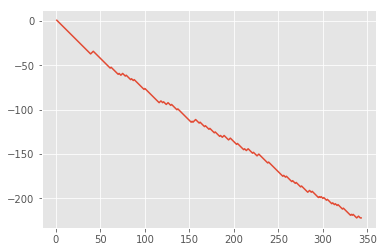

In [64]:
import matplotlib.pyplot as pp
import matplotlib.animation as ani
from matplotlib import style
import time

style.use("ggplot")
fig = pp.figure()
ax1 =fig.add_subplot(1,1,1)

def animation(i):
    pullData =open("twitter-out.txt","r").read()
    lines=pullData.split('\n')
    
    xar=[]
    yar=[]
    
    x=0
    y=0
    
    for l in lines:
        x+=1
        if "pos" in l:
            y+=1
        elif "neg" in l:
            y-=1
            
        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    ax1.plot(xar,yar)

anim = ani.FuncAnimation(fig,animation,interval=1000)
pp.show()